In [487]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [488]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [489]:
def u_initial(nx,xbegin,xend,nt,rhol0,ul0,pl0,rhor0,ur0,pr0):
    x = numpy.linspace(xbegin,xend,nx)
    uvect = numpy.random.rand(nt,3,nx)
    uvect[:,:,:] = 0
    u1 = numpy.asarray(uvect[:,0,:])
    u1[:,:(nx-1)/2+1]=rhol0
    u1[:,(nx-1)/2:]=rhor0
    u2 = numpy.asarray(uvect[:,1,:])
    u2[:,:(nx-1)/2+1]=ul0
    u2[:,(nx-1)/2:]=ur0
    u3 = numpy.asarray(uvect[:,2,:])
    u3[:,:(nx-1)/2+1]=pl0
    u3[:,(nx-1)/2:]=pr0
    
    return uvect


In [490]:
nx = 81
dx = .25
dt = .0002
nt = 50
xend = 10
xbegin =-10
gamma = 1.4
rhol0 = 1
ul0 = 0.0
pl0 = 100000
rhor0 = .125
ur0 = 0.0
pr0 = 10000

x = numpy.linspace(xbegin,xend,nx)
u=u_initial(nx,xbegin,xend,nt,rhol0,ul0,pl0,rhor0,ur0,pr0)

/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.p

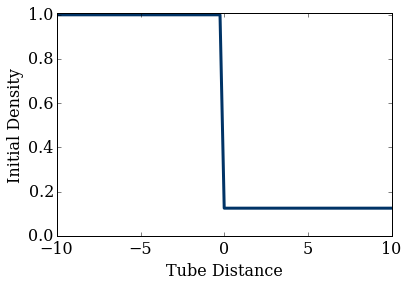

In [491]:
pyplot.plot(x, u[0,0], color='#003366', ls='-', lw=3)
pyplot.ylabel('Initial Density')
pyplot.xlabel('Tube Distance')
pyplot.ylim(0,1.01);

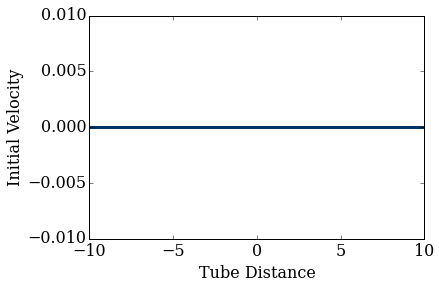

In [492]:
pyplot.plot(x, u[0,1], color='#003366', ls='-', lw=3)
pyplot.ylabel('Initial Velocity')
pyplot.xlabel('Tube Distance')
pyplot.ylim(-.01,.01);

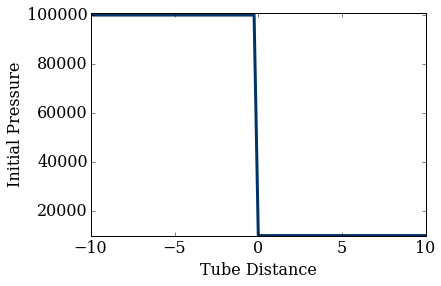

In [493]:
pyplot.plot(x, u[0,2], color='#003366', ls='-', lw=3)
pyplot.ylabel('Initial Pressure')
pyplot.xlabel('Tube Distance')
pyplot.ylim(9900,101000);

In [553]:
    u=u_initial(nx,xbegin,xend,nt,rhol0,ul0,pl0,rhor0,ur0,pr0)
    un = u.copy()
    ustarplus = u[0,:,:].copy()
    ustarplus[:,:]=0
    ustarminus = u[0,:,:].copy()
    ustarminus[:,:]=0
    Fstarplus = u[0,:,:].copy()
    Fstarplus[:,:]=0
    Fstarminus = u[0,:,:].copy()
    Fstarminus[:,:]=0
    F = u[0,:,:].copy()
    F[:,:]=0
    
    for n in range(1,nt):
        F[0] = u[n,1,:]
        F[1] = (u[n,1,:])**2/(u[n,0,:])+(gamma-1)*((u[n,2,:])-.5*((u[n,1,:])**2/(u[n,0,:])))
        F[2] = ((u[n,2,:])+(gamma-1)*((u[n,2,:])-.5*((u[n,1,:])**2/(u[n,0,:]))))*((u[n,1,:])/(u[n,0,:]))
        
        ustarplus[:,:-1] = .5*(u[n,:,1:]-u[n,:,:-1])-dt/(2*dx)*(F[:,1:]-F[:,:-1])
        ustarminus[:,1:] = .5*(u[n,:,:-1]-u[n,:,1:])-dt/(2*dx)*(F[:,:-1]-F[:,1:]) #maybe this is bacakwards and needs u(i-1) - u(i)
        
        Fstarplus[0] = ustarplus[1,:]
        Fstarplus[1] = (ustarplus[1,:])**2/(ustarplus[0,:])+(gamma-1)*((ustarplus[2,:])-.5*((ustarplus[1,:])**2/(ustarplus[0,:])))
        Fstarplus[2] = ((ustarplus[2,:])+(gamma-1)*((ustarplus[2,:])-.5*((ustarplus[1,:])**2/(ustarplus[0,:]))))*((ustarplus[1,:])/(ustarplus[0,:]))
        
        Fstarminus[0] = ustarminus[1,:]
        Fstarminus[1] = (ustarminus[1,:])**2/(ustarminus[0,:])+(gamma-1)*((ustarminus[2,:])-.5*((ustarminus[1,:])**2/(ustarminus[0,:])))
        Fstarminus[2] = ((ustarminus[2,:])+(gamma-1)*((ustarminus[2,:])-.5*((ustarminus[1,:])**2/(ustarminus[0,:]))))*((ustarminus[1,:])/(ustarminus[0,:]))
       
        un[n,:,1:] = u[n,:,1:]-dt/dx*(Fstarplus[:,1:]-Fstarminus[:,:-1])
        u[n,:,:] = un[n,:,:].copy()

un

/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:10: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:12: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.p

array([[[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
           1.25000000e-01,   1.25000000e-01,   1.25000000e-01],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  1.00000000e+05,   1.00000000e+05,   1.00000000e+05, ...,
           1.00000000e+04,   1.00000000e+04,   1.00000000e+04]],

       [[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
           1.25000000e-01,   1.25000000e-01,   1.25000000e-01],
        [  0.00000000e+00,              nan,              nan, ...,
                      nan,              nan,              nan],
        [  1.00000000e+05,              nan,              nan, ...,
                      nan,              nan,              nan]],

       [[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00, ...,
           1.25000000e-01,   1.25000000e-01,   1.25000000e-01],
        [  0.00000000e+00,              nan,              nan, ...,
    

In [528]:
def richtmeyer(u, nt, dt, dx, gamma):
    un = u.copy()
    ustarplus = u[0,:,:].copy()
    ustarplus[:,:]=0
    ustarminus = u[0,:,:].copy()
    ustarminus[:,:]=0
    Fstarplus = u[0,:,:].copy()
    Fstarplus[:,:]=0
    Fstarminus = u[0,:,:].copy()
    Fstarminus[:,:]=0
    F = u[0,:,:].copy()
    F[:,:]=0
    
    for n in range(1,nt):
        F[0] = u[n,1,:]
        F[1] = (u[n,1,:])**2/(u[n,0,:])+(gamma-1)*((u[n,2,:])-.5*((u[n,1,:])**2/(u[n,0,:])))
        F[2] = ((u[n,2,:])+(gamma-1)*((u[n,2,:])-.5*((u[n,1,:])**2/(u[n,0,:]))))*((u[n,1,:])/(u[n,0,:]))
        
        ustarplus[:,:-1] = .5*(u[n,:,1:]-u[n,:,:-1])-dt/(2*dx)*(F[:,1:]-F[:,:-1])
        ustarminus[:,1:] = .5*(u[n,:,:-1]-u[n,:,1:])-dt/(2*dx)*(F[:,:-1]-F[:,1:]) #maybe this is bacakwards and needs u(i-1) - u(i)
        
        Fstarplus[0] = ustarplus[1,:]
        Fstarplus[1] = (ustarplus[1,:])**2/(ustarplus[0,:])+(gamma-1)*((ustarplus[2,:])-.5*((ustarplus[1,:])**2/(ustarplus[0,:])))
        Fstarplus[2] = ((ustarplus[2,:])+(gamma-1)*((ustarplus[2,:])-.5*((ustarplus[1,:])**2/(ustarplus[0,:]))))*((ustarplus[1,:])/(ustarplus[0,:]))
        
        Fstarminus[0] = ustarminus[1,:]
        Fstarminus[1] = (ustarminus[1,:])**2/(ustarminus[0,:])+(gamma-1)*((ustarminus[2,:])-.5*((ustarminus[1,:])**2/(ustarminus[0,:])))
        Fstarminus[2] = ((ustarminus[2,:])+(gamma-1)*((ustarminus[2,:])-.5*((ustarminus[1,:])**2/(ustarminus[0,:]))))*((ustarminus[1,:])/(ustarminus[0,:]))
       
        un[n,:,:] = u[n,:,:]-dt/dx*(Fstarplus-Fstarminus)
        
        u = un.copy()
        
    return un

In [529]:
richtmeyer(u, nt, dt, dx, gamma);

/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in true_divide
/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in true_divide
/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:27: RuntimeWarning: invalid value encountered in true_divide
/home/gwu-6286/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in true_divide


ValueError: operands could not be broadcast together with shapes (3,79) (3,81) 

In [530]:
unout1 = numpy.zeros((nt, nx))
for b in range(0,nt):
    for c in range(0,nx):
        unout1[b,c] = un[b,0,c]



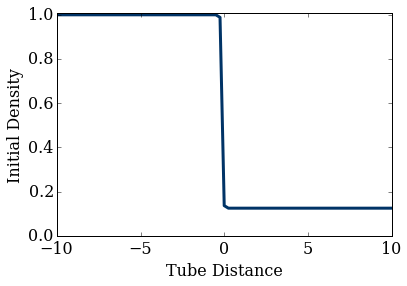

In [535]:

pyplot.plot(x, unout1[49,:], color='#003366', ls='-', lw=3)
pyplot.ylabel('Initial Density')
pyplot.xlabel('Tube Distance')
pyplot.ylim(0,1.01);